<a href="https://colab.research.google.com/github/yangyang1598/DSM_System/blob/main/Team_Project_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://github.com/kairess/eye_blink_detector.git

## GitHub 자료 다운로드

In [ ]:
! git clone https://github.com/YJiHun/Team_Project_eye_blink_detector.git

Cloning into 'Team_Project_eye_blink_detector'...
remote: Enumerating objects: 1184, done.
remote: Counting objects: 100% (1184/1184), done.
remote: Compressing objects: 100% (1178/1178), done.
remote: Total 1184 (delta 7), reused 1178 (delta 4), pack-reused 0
Receiving objects: 100% (1184/1184), 351.75 MiB | 32.29 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (1171/1171), done.


- 사용 라이브러리 및 모듈 임포트(연결)

In [ ]:
# import datetime
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
# from keras.models import Model, load_model
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# # plt.style.use('dark_background')

- GitHub 파일 링크

In [ ]:
Dir_Path_Main = 'Team_Project_eye_blink_detector/'
Dir_Path_Data = 'dataset/'

## DataSet 불러오기
- csv 자료형을 numpy로 변환 함수

In [ ]:
import numpy as np
import csv

In [ ]:
def read_csv(path):
  width = 34
  height = 26
  dims = 1

  with open(path,'r') as f:
    #read the scv file with the dictionary format
    reader = csv.DictReader(f)
    rows = list(reader)

  #imgs is a numpy array with all the images
  #tgs is a numpy array with the tags of the images
  imgs = np.empty((len(list(rows)),height,width, dims),dtype=np.uint8)
  tgs = np.empty((len(list(rows)),1))

  for row,i in zip(rows,range(len(rows))):
    #convert the list back to the image format
    img = row['image']
    img = img.strip('[').strip(']').split(', ')
    im = np.array(img,dtype=np.uint8)
    im = im.reshape((height, width))
    im = np.expand_dims(im, axis=2)
    imgs[i] = im

    #the tag for open is 1 and for close is 0
    tag = row['state']
    if tag == 'open':
      tgs[i] = 1
    else:
      tgs[i] = 0

  #shuffle the dataset
  index = np.random.permutation(imgs.shape[0])
  imgs = imgs[index]
  tgs = tgs[index]

  #return images and their respective tags
  return imgs, tgs

- csv 자료형 numpy 자료형으로 변경

In [ ]:
import os

X, y = read_csv(os.path.join(Dir_Path_Main + Dir_Path_Data, 'dataset.csv'))

print(X.shape, y.shape)

(2874, 26, 34, 1) (2874, 1)


- Data 시각화

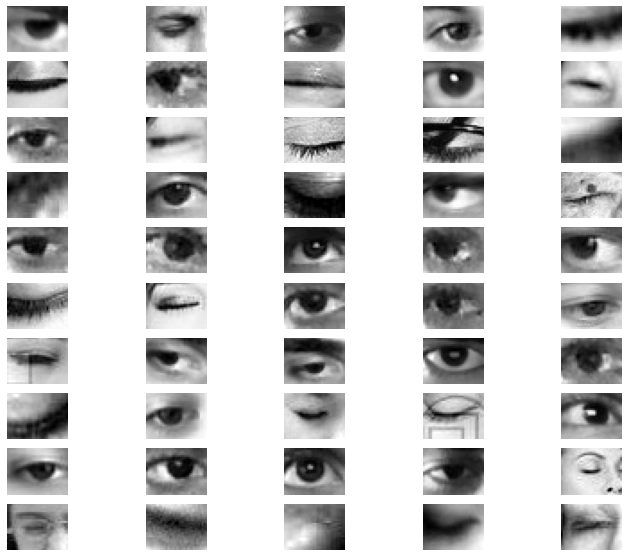

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape((26, 34)), cmap='gray')

(2874, 26, 34, 1) (2874, 1)


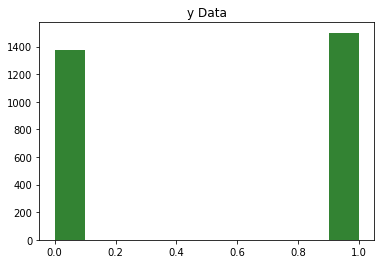

In [ ]:
print(X.shape, y.shape)
plt.hist(y, color = ('darkgreen'), alpha = 0.8, rwidth = 1)

plt.title('y Data')
plt.show()

## DataSet 분리
- x,y_train, x,y_test 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


- 시각화

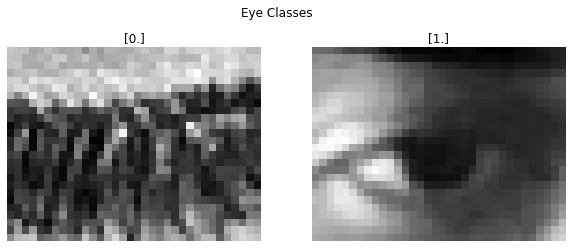

In [ ]:
fig = plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.title(str(y_train[0]))
plt.axis('off')
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')

plt.subplot(1, 2, 2)
plt.title(str(y_test[4]))
plt.axis('off')
plt.imshow(x_test[4].reshape((26, 34)), cmap='gray')

plt.suptitle("Eye Classes")
plt.show()

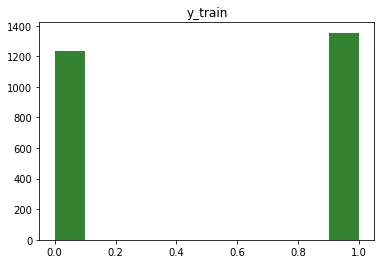

In [ ]:
plt.hist(y_train, color = ('darkgreen'), alpha = 0.8, rwidth = 1)

plt.title('y_train')
plt.show()

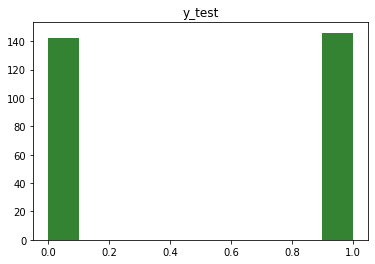

In [ ]:
plt.hist(y_test, color = ('darkgreen'), alpha = 0.8, rwidth = 1)

plt.title('y_test')
plt.show()

- 데이터 저장

In [ ]:
np.save(Dir_Path_Main + Dir_Path_Data + 'x_train.npy', x_train)
np.save(Dir_Path_Main + Dir_Path_Data + 'y_train.npy', y_train)
np.save(Dir_Path_Main + Dir_Path_Data + 'x_test.npy', x_test)
np.save(Dir_Path_Main + Dir_Path_Data + 'y_test.npy', y_test)

## 학습
- 트레인 데이터 로드


In [ ]:
import numpy as np

Dir_Path_Main = 'Team_Project_eye_blink_detector/'
Dir_Path_Data = 'dataset/'

x_train = np.load(Dir_Path_Main + Dir_Path_Data + 'x_train.npy').astype(np.float32)
y_train = np.load(Dir_Path_Main + Dir_Path_Data + 'y_train.npy').astype(np.float32)
x_test = np.load(Dir_Path_Main + Dir_Path_Data + 'x_test.npy').astype(np.float32)
y_test = np.load(Dir_Path_Main + Dir_Path_Data + 'y_test.npy').astype(np.float32)

- 데이터 크기 확인

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


- 시각화

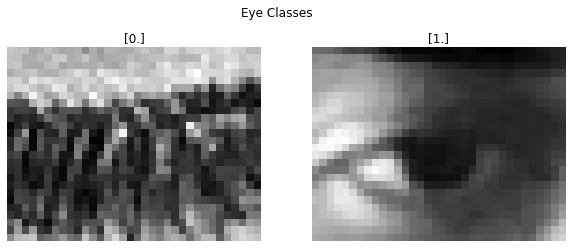

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.title(str(y_train[0]))
plt.axis('off')
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')

plt.subplot(1, 2, 2)
plt.title(str(y_test[4]))
plt.axis('off')
plt.imshow(x_test[4].reshape((26, 34)), cmap='gray')

plt.suptitle("Eye Classes")
plt.show()


- 학습 데이터 자료형 확인

In [ ]:
x_train.shape, y_train.shape

((2586, 26, 34, 1), (2586, 1))

## 학습률 개선
- build model
  - softmax

In [ ]:
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model
from tensorflow.keras import  utils
import datetime

inputs = Input(shape=(26, 34, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)

outputs_softmax = Activation('softmax')(net)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26, 34, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 4, 128)         0     

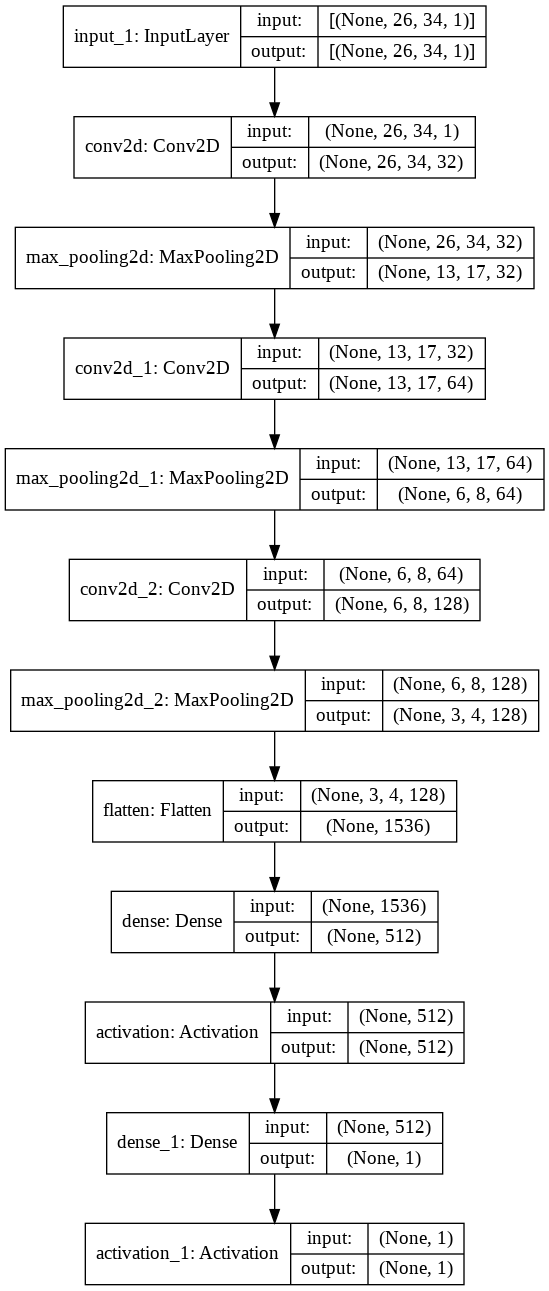

In [ ]:
model_soft = Model(inputs=inputs, outputs=outputs_softmax)

model_soft.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model_soft.summary()
utils.plot_model(model_soft,show_shapes=True)

In [ ]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

soft_hist = model_soft.fit(x_train, y_train, epochs=10)

Epoch 1/10
81/81 [==============================] - 31s 11ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 2/10
81/81 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 3/10
81/81 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 4/10
81/81 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 5/10
81/81 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 6/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 7/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 8/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 9/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - acc: 0.5236
Epoch 10/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - acc: 0.5236


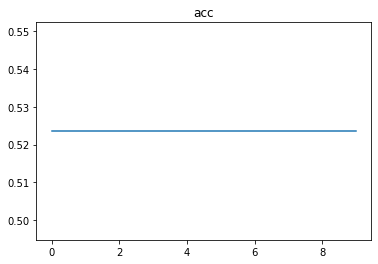

In [ ]:
plt.plot(soft_hist.history['acc'])
plt.title('acc')
plt.show()

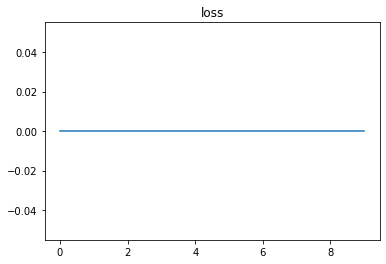

In [ ]:
plt.plot(soft_hist.history['loss'])
plt.title('loss')
plt.show()

- build model
  - sigmoid
  

In [ ]:
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model
import datetime

inputs = Input(shape=(26, 34, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)

outputs_sigmoid = Activation('sigmoid')(net)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 26, 34, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 4, 128)         0   

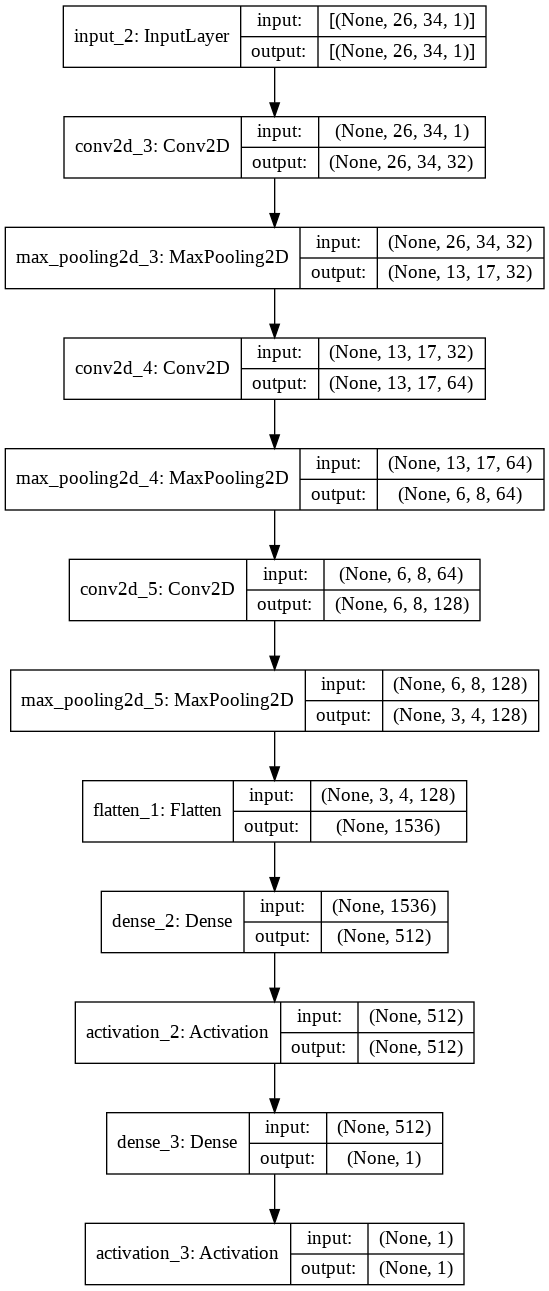

In [ ]:
model_sig = Model(inputs=inputs, outputs=outputs_sigmoid)

model_sig.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model_sig.summary()
utils.plot_model(model_sig,show_shapes=True)

In [ ]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

sig_hist = model_sig.fit(x_train, y_train, epochs=10)

Epoch 1/10
81/81 [==============================] - 2s 10ms/step - loss: 1.7542 - acc: 0.8329
Epoch 2/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0811 - acc: 0.9783
Epoch 3/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0458 - acc: 0.9857
Epoch 4/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0457 - acc: 0.9876
Epoch 5/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0329 - acc: 0.9896
Epoch 6/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0145 - acc: 0.9957
Epoch 7/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0344 - acc: 0.9888
Epoch 8/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0243 - acc: 0.9927
Epoch 9/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0186 - acc: 0.9930
Epoch 10/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0113 - acc: 0.9957


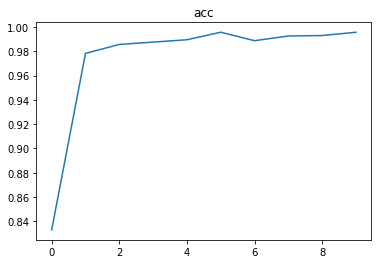

In [ ]:
plt.plot(sig_hist.history['acc'])
plt.title('acc')
plt.show()

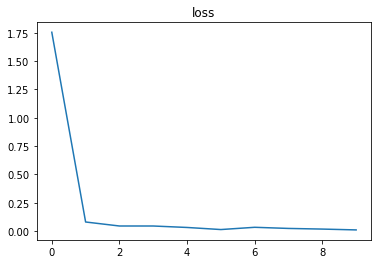

In [ ]:
plt.plot(sig_hist.history['loss'])
plt.title('loss')
plt.show()

- 학습모델 저장

In [ ]:
model_sig.save(Dir_Path_Main + 'models/eyes_blink_detector.h5')

## 학습 Test
- sigmoid

In [ ]:
score = model_sig.evaluate(x_test, y_test, verbose=1)

9/9 [==============================] - 0s 4ms/step - loss: 0.0109 - acc: 0.9931


In [ ]:
print('Acc :',score[1])

Acc : 0.9930555820465088


In [ ]:
print('Loss :',score[0])

Loss : 0.010868335142731667


- 데이터 예측

In [ ]:
pred = model_sig.predict(x_test)
x_test.shape, pred.shape

((288, 26, 34, 1), (288, 1))

- 예측데이터 자료형 확인

In [ ]:
eye_open_pred = (pred[:] >= 0.5).reshape(-1)
eye_open_pred.shape

(288,)

In [ ]:
eye_close_pred = (pred[:] < 0.5).reshape(-1)
eye_close_pred.shape

(288,)

In [ ]:
print(f'eye_open  : {y_test[y_test == 1].shape[0]}')
print(f'eye_close : {y_test[y_test == 0].shape[0]}')

eye_open  : 146
eye_close : 142


In [ ]:
x_img_open = x_test[eye_open_pred]
y_img_open = y_test[eye_open_pred]

x_img_open.shape, y_img_open.shape

((144, 26, 34, 1), (144, 1))

In [ ]:
x_img_close = x_test[eye_close_pred]
y_img_close = y_test[eye_close_pred]

x_img_close.shape, y_img_close.shape

((144, 26, 34, 1), (144, 1))

- 예측 데이터 시각화

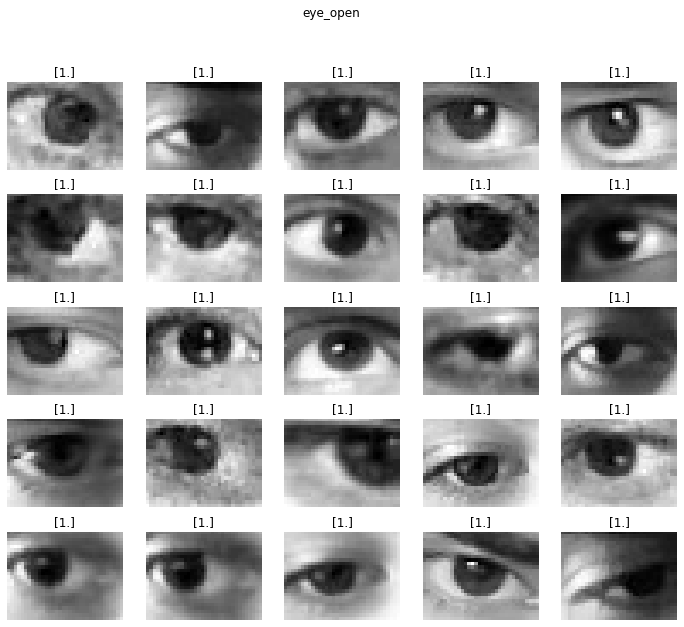

In [ ]:
plt.figure(figsize=(6*2,2*5))
for num, img in enumerate(x_img_open[0:25]):
  plt.subplot(5,5,1+num)
  plt.title(str(y_img_open[num]))
  plt.axis('off')
  plt.imshow(img.reshape(26,34), cmap='gray')

plt.suptitle('eye_open')
plt.show()

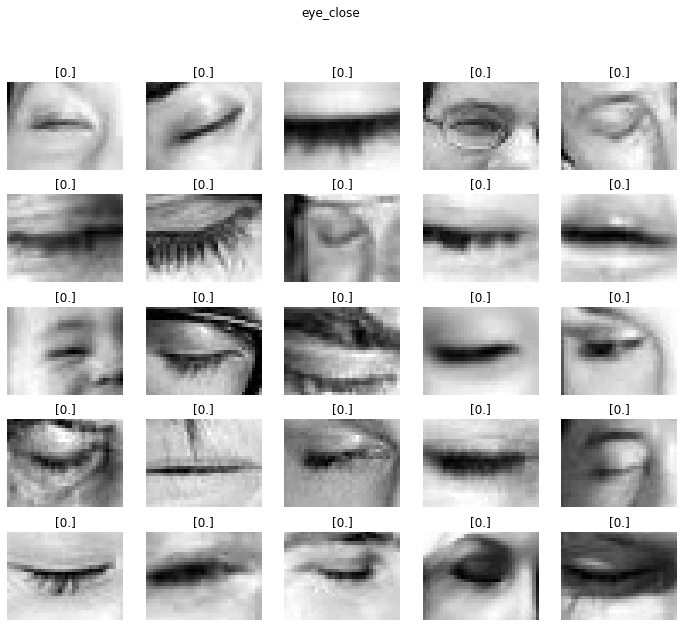

In [ ]:
plt.figure(figsize=(6*2,2*5))
for num, img in enumerate(x_img_close[0:25]):
  plt.subplot(5,5,1+num)
  plt.title(str(y_img_close[num]))
  plt.axis('off')
  plt.imshow(img.reshape(26,34), cmap='gray')

plt.suptitle('eye_close')
plt.show()

(288, 1)


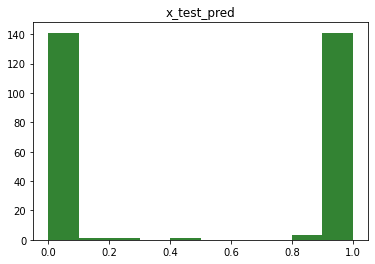

In [ ]:
print(pred.shape)
plt.hist(pred, color = ('darkgreen'), alpha = 0.8, rwidth = 1)

plt.title('x_test_pred')
plt.show()

## Eyes_Blink_Detector

In [ ]:
Dir_Path_Main = 'Team_Project_eye_blink_detector/'
Dir_Path_Data = 'dataset/'

### Face Shapes Detector를 통하여 이미지 크롭 함수 생성

In [ ]:
def crop_eye(img, IMG_SIZE, eye_points):
  x1, y1 = np.amin(eye_points, axis=0) ## 눈 좌표의 왼쪽 부분 위치 추출
  x2, y2 = np.amax(eye_points, axis=0) ## 눈 좌표의 오른쪽 부분 위치 추출
  cx, cy = (x1 + x2) / 2, (y1 + y2) / 2 ## 눈 좌표의 센터 추출

  w = (x2 - x1) * 1.2 ## 눈 좌표를 이용하여 눈 이미지 weigth 지정
  h = w * IMG_SIZE[1] / IMG_SIZE[0] ## 눈 이미지 weigth 비율에 맞춰 / 눈 이미지 high

  margin_x, margin_y = w / 2, h / 2 ## weigth , high 중앙

  min_x, min_y = int(cx - margin_x), int(cy - margin_y) ## 조금 더넓게 이미지를 가져오기 위함
  max_x, max_y = int(cx + margin_x), int(cy + margin_y) ## 조금 더넓게 이미지를 가져오기 위함

  eye_rect = np.rint([min_x, min_y, max_x, max_y]).astype(np.int) ## 소수를 반올림 하여 정수형으로 저장

  eye_img = img[eye_rect[1]:eye_rect[3], eye_rect[0]:eye_rect[2]] ## 눈이미지만 따옴

  return eye_img, eye_rect

### 학습 모델 로드
- Model Load

In [ ]:
import dlib

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(Dir_Path_Main + 'shape_predictor_68_face_landmarks.dat')

In [ ]:
from keras.models import load_model

model = load_model(Dir_Path_Main + 'models/eyes_blink_detector.h5')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 26, 34, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 4, 128)         0   

In [ ]:
# from google.colab.patches import cv2_imshow
# import cv2, dlib
# from imutils import face_utils
# from keras.models import load_model
# import copy

### Image Detector Step
- Image Load

In [ ]:
import cv2, copy
from google.colab.patches import cv2_imshow
from imutils import face_utils

img = cv2.imread(Dir_Path_Main + 'imag/video_1/144.jpg')
# img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img.shape, gray.shape)

(1080, 1920, 3) (1080, 1920)


- Face Detector

In [ ]:
faces = detector(gray)
print(len(faces))
print(faces)

1
rectangles[[(783, 198) (1093, 508)]]


- Face Detector Show

In [ ]:
Color = (0, 255, 0)
img_r = img.copy()
for face in faces:
  p1 = (face.left(), face.top())
  p2 = (face.right(), face.bottom())

  cv2.rectangle(img_r, p1, p2, color= Color, thickness = 2)

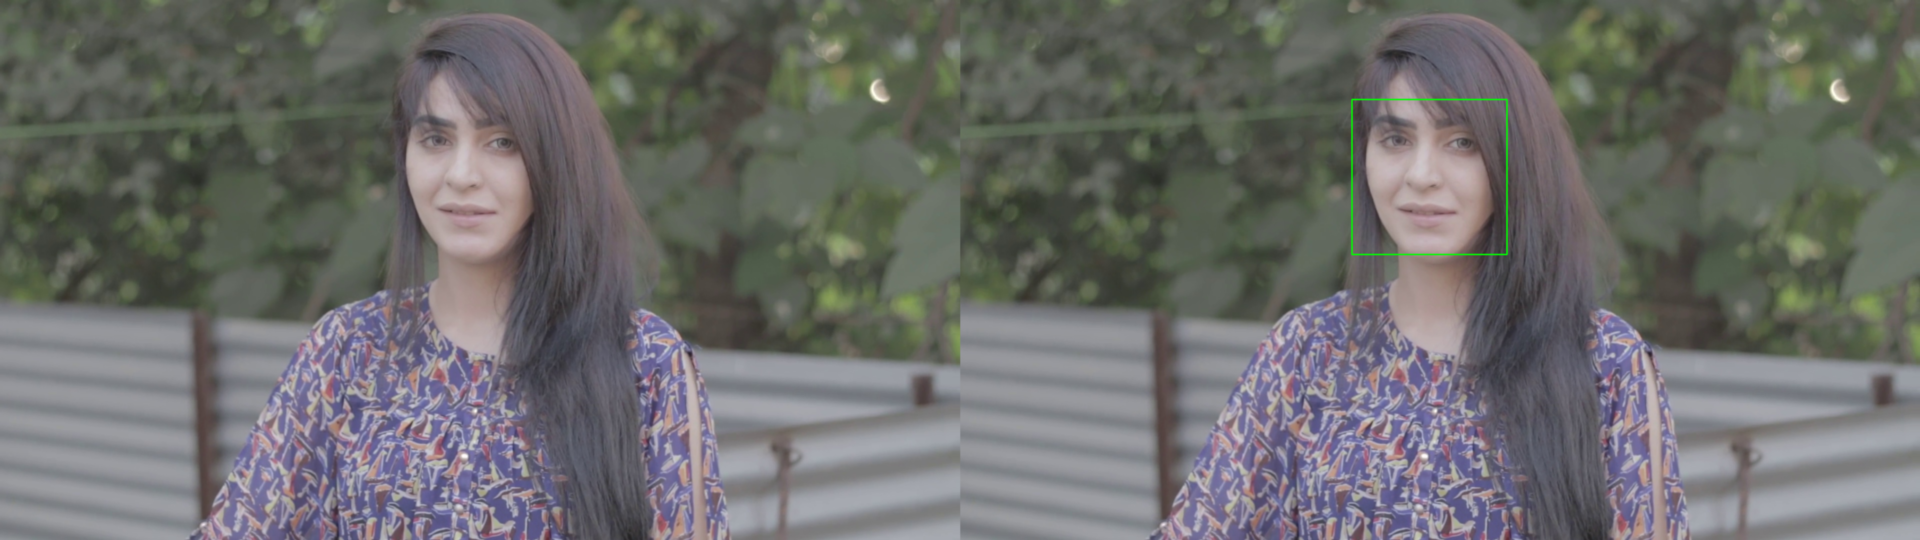

In [ ]:
face_detector = cv2.hconcat([img,img_r])
face_detector = cv2.pyrDown(face_detector)
cv2_imshow(face_detector)

- Face Shapes Detector

In [ ]:
shapes = []
for face in faces:
  shape = predictor(gray, face)
  shapes.append(face_utils.shape_to_np(shape))

In [ ]:
img_s = img.copy()
Color_l = (255, 255, 0)
Color_r = (0, 255, 255)

for shape in shapes:
  for num, (x, y) in enumerate(shape):
    p1 = (x, y)
    if num >= 36 and num < 42:
      cv2.circle(img_s, p1, 2, color = Color_l, thickness = -1)
    elif num >= 42 and num < 48:
      cv2.circle(img_s, p1, 2, color = Color_r, thickness = -1)
    else:
      cv2.circle(img_s, p1, 2, color = Color, thickness = -1)

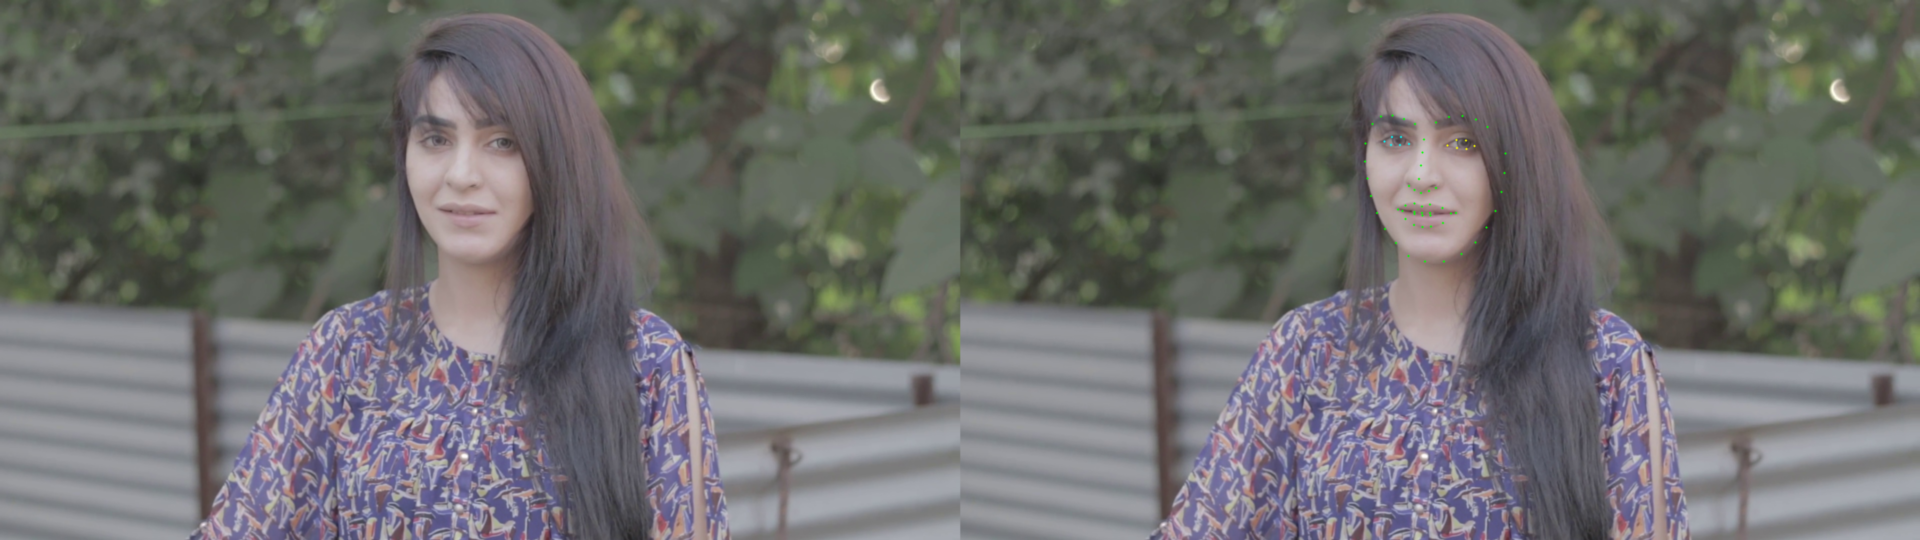

In [ ]:
face_shape = cv2.hconcat([img,img_s])
face_shape = cv2.pyrDown(face_shape)
cv2_imshow(face_shape)

- Eyes Detector

In [ ]:
IMG_SIZE = (34, 26)
eyes_img_l = []
eyes_img_r = []
eyes_rect_l = []
eyes_rect_r = []

for shape in shapes:
    eye_img_l, eye_rect_l = crop_eye(gray, IMG_SIZE, eye_points=shape[36:42])
    eye_img_r, eye_rect_r = crop_eye(gray, IMG_SIZE, eye_points=shape[42:48])

    eye_img_l = cv2.resize(eye_img_l, dsize = IMG_SIZE)
    eye_img_r = cv2.resize(eye_img_r, dsize = IMG_SIZE)
    eye_img_r = cv2.flip(eye_img_r, flipCode = 1)

    eyes_img_l.append(eye_img_l)
    eyes_img_r.append(eye_img_r)
    eyes_rect_l.append(eye_rect_l)
    eyes_rect_r.append(eye_rect_r)

In [ ]:
inputs_l = []
inputs_r = []

for eye_l, eye_r in zip(eyes_img_l, eyes_img_r):
  input_l = eye_l.reshape(IMG_SIZE[1], IMG_SIZE[0], 1)
  input_r = eye_r.reshape(IMG_SIZE[1], IMG_SIZE[0], 1)

  inputs_l.append(input_l)
  inputs_r.append(input_r)

inputs_l = np.array(inputs_l)
inputs_r = np.array(inputs_r)

In [ ]:
pred_l = model.predict(inputs_l)
pred_r = model.predict(inputs_r)

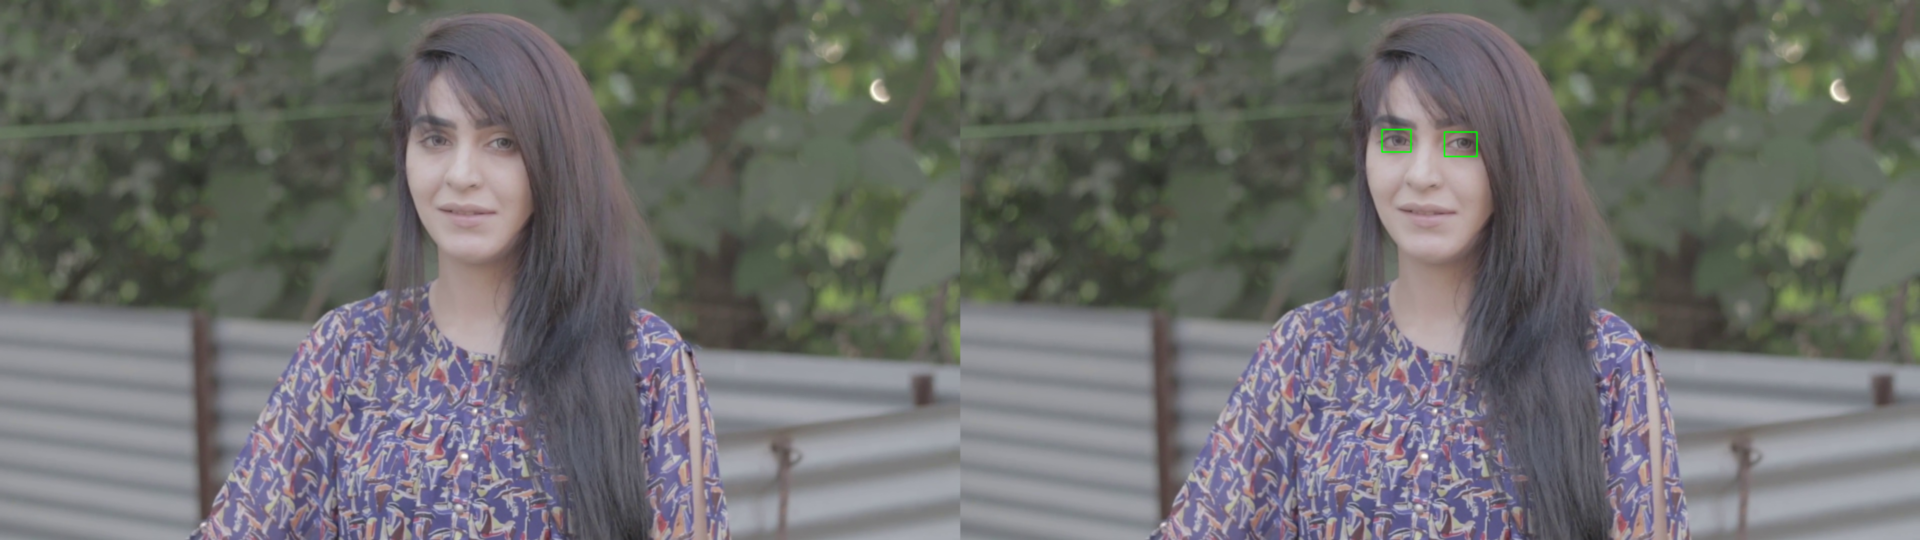

In [ ]:
eye_r = img.copy()

for num, (rect_l,rect_r) in enumerate(zip(eyes_rect_l, eyes_rect_r)):
  l_x1, l_y1, l_x2, l_y2 = rect_l
  r_x1, r_y1, r_x2, r_y2 = rect_r

  if pred_l[num] >= 0.5:
    Color_l = (0, 255, 0)
  else:
    Color_l = (0, 0, 255)
  if pred_r[num] >= 0.5:
    Color_r = (0, 255, 0)
  else:
    Color_r = (0, 0, 255)

  cv2.rectangle(eye_r, (l_x1, l_y1), (l_x2, l_y2), color = Color_l, thickness = 2)
  cv2.rectangle(eye_r, (r_x1, r_y1), (r_x2, r_y2), color = Color_r, thickness = 2)

face_eye_r = cv2.hconcat([img, eye_r])
face_eye_r = cv2.pyrDown(face_eye_r)
cv2_imshow(face_eye_r)

## Image Detector
- Image Load

In [ ]:
import cv2, copy
from google.colab.patches import cv2_imshow
from imutils import face_utils

img = cv2.imread(Dir_Path_Main + 'imag/video_1/610.jpg')
# img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img.shape, gray.shape)

(1080, 1920, 3) (1080, 1920)


- Face Detector

In [ ]:
faces = detector(gray)
print(len(faces))
print(faces)

1
rectangles[[(714, 233) (1024, 542)]]


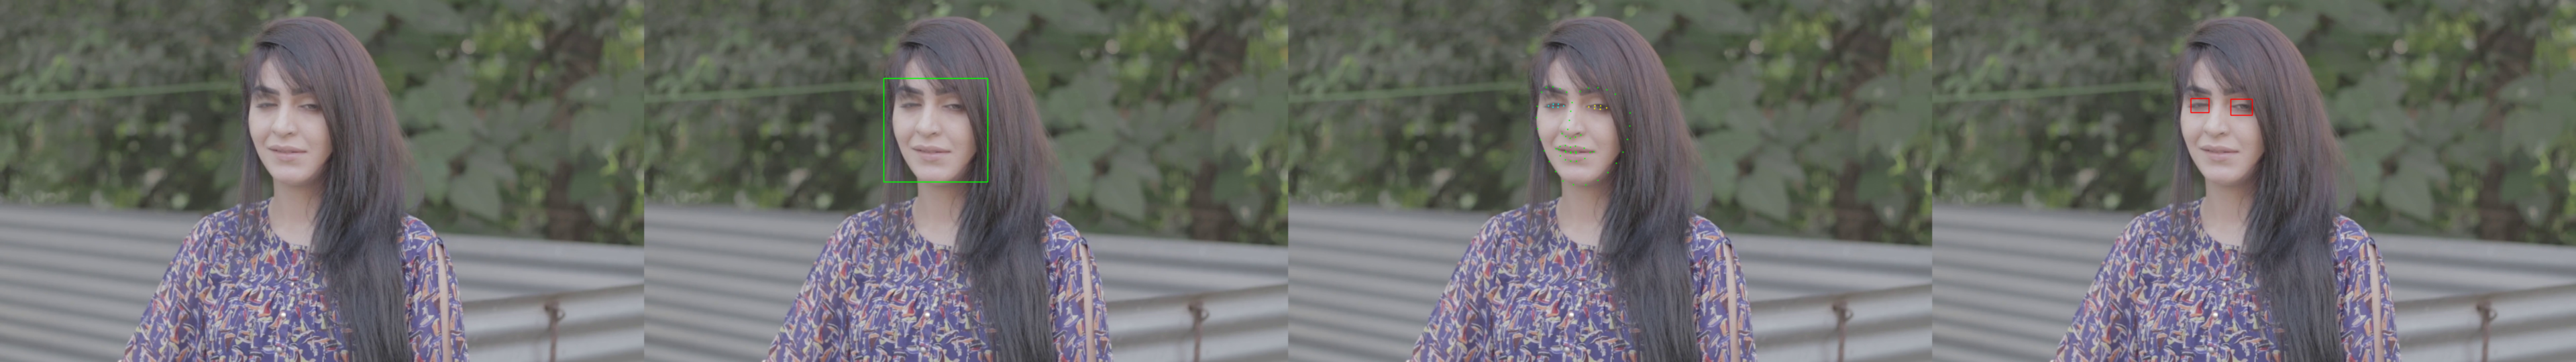

In [ ]:
Color = (0, 255, 0)
IMG_SIZE = (34, 26)
img_r = img.copy()
img_s = img.copy()
eye_r = img.copy()

for face in faces:
  p1 = (face.left(), face.top())
  p2 = (face.right(), face.bottom())

  shapes = predictor(gray, face)
  shapes = face_utils.shape_to_np(shapes)

  eye_img_l, eye_rect_l = crop_eye(gray, IMG_SIZE, eye_points=shapes[36:42])
  eye_img_r, eye_rect_r = crop_eye(gray, IMG_SIZE, eye_points=shapes[42:48])

  eye_img_l = cv2.resize(eye_img_l, dsize = IMG_SIZE)
  eye_img_r = cv2.resize(eye_img_r, dsize = IMG_SIZE)
  eye_img_r = cv2.flip(eye_img_r, flipCode = 1)

  input_l = eye_img_l.reshape(1, IMG_SIZE[1], IMG_SIZE[0], 1)
  input_r = eye_img_r.reshape(1, IMG_SIZE[1], IMG_SIZE[0], 1)

  pred_l = model.predict(input_l)
  pred_r = model.predict(input_r)

  cv2.rectangle(img_r, p1, p2, color= Color, thickness = 2)

  color_l = (255, 255, 0)
  color_r = (0, 255, 255)
  
  for num, (x, y) in enumerate(shapes):
    center = (x, y)
    if num >= 36 and num < 42:
      cv2.circle(img_s, center, 2, color = color_l, thickness = -1)
    elif num >= 42 and num < 48:
      cv2.circle(img_s, center, 2, color = color_r, thickness = -1)
    else:
      cv2.circle(img_s, center, 2, color = Color, thickness = -1)
  
  if pred_l >= 0.5:
    Color_l = (0, 255, 0)
  else:
    Color_l = (0, 0, 255)
    
  if pred_r >= 0.5:
    Color_r = (0, 255, 0)
  else:
    Color_r = (0, 0, 255)

  cv2.rectangle(eye_r, tuple(eye_rect_l[0:2]), tuple(eye_rect_l[2:]), color= Color_l, thickness = 2)
  cv2.rectangle(eye_r, tuple(eye_rect_r[0:2]), tuple(eye_rect_r[2:]), color= Color_r, thickness = 2)

result = cv2.hconcat([img, img_r, img_s, eye_r])
result = cv2.pyrDown(result)
cv2_imshow(result)